In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D



In [3]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [4]:
df_train = pd.read_csv(r'C:\Users\agrand6\OneDrive - University of Illinois at Chicago\Code\CodeDumps\Mnist\train.csv')

In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


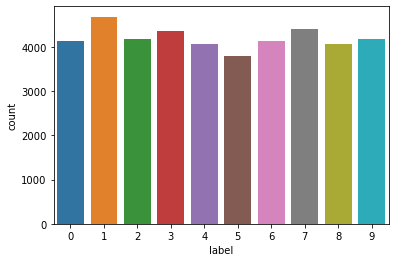

In [6]:
#Distribution of the numbers

g = sns.countplot(x = "label", data = df_train)

In [7]:
x_train = df_train.drop('label', axis = 1)
y_train = df_train['label']

In [16]:
y_train.isnull().sum()

0

In [8]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [9]:
x_train.shape

(42000, 784)

In [10]:
#Understanding the reshape function

a = np.arange(6)
b = a.reshape((2, 3))
print(a)
print(b)

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]


In [19]:
x_train_arr = (df_train.iloc[:,1:].values).astype('float32')

In [20]:
x_train_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, '4')

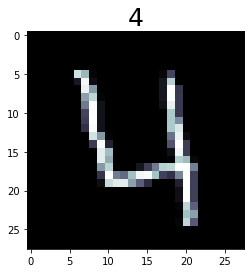

In [51]:
# Visualizing the numbers in the array
# Taking an example from the training data, we can see that

x_train_arr = x_train_arr.reshape(42000, 28, 28)

plt.imshow(x_train_arr[3], cmap=plt.get_cmap('bone'))
plt.title(y_train[3], fontsize=25)


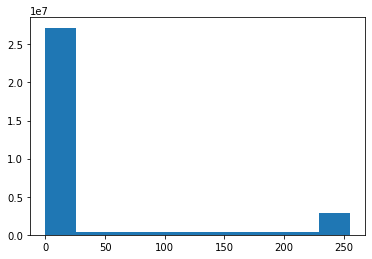

In [47]:
# seeing the distribution of the values in the x_train_arr
# We can see that most of the values are either 0 or near 250 ish.
# Based on this, we require a normalization function to convert the values into 0-1
x = x_train_arr.ravel()
n, bins, patches = plt.hist(x)
plt.show()